In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
cvd = pd.read_csv('covidd.csv')

In [3]:
cvd.head(5)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [4]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [5]:
cvd['Date'] = pd.to_datetime(cvd['Date'])

In [6]:
cvd['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 31822 entries, 0 to 31821
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
31822 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 248.7 KB


In [7]:
cvd.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

In [8]:
cvd['Month'] = cvd['Date'].dt.to_period('M')
cvd.head(5)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Month
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN,2020-03
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0,2020-03
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN,2020-03
3,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,...,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN,2020-03
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0,2020-03


In [9]:
cvd['Month'].value_counts()

2021-05    1085
2021-03    1085
2022-05    1085
2022-03    1085
2022-01    1085
2021-12    1085
2021-10    1085
2021-08    1085
2021-07    1085
2022-08    1085
2022-07    1085
2020-08    1085
2020-12    1085
2020-05    1085
2020-10    1085
2020-07    1085
2021-01    1085
2021-11    1050
2022-06    1050
2022-04    1050
2020-06    1050
2021-06    1050
2020-09    1050
2021-09    1050
2020-11    1050
2021-04    1050
2020-04    1033
2022-02     980
2021-02     980
2022-09     524
2020-03     410
Freq: M, Name: Month, dtype: int64

In [10]:
group = cvd.groupby('Month')[['Total Deaths','Total Recovered','Total Active Cases']].median().reset_index()
group

,Month,Total Deaths,Total Recovered,Total Active Cases
0,2020-03,1.0,3.0,-1.0
1,2020-04,3.0,6.0,14.0
2,2020-05,6.0,51.0,99.0
3,2020-06,11.0,182.5,135.5
4,2020-07,20.0,419.0,238.0
5,2020-08,36.0,1048.0,467.0
6,2020-09,71.0,1802.0,710.0
7,2020-10,123.0,3143.0,726.0
8,2020-11,170.5,4494.5,780.5
9,2020-12,238.0,5833.0,1257.0


In [11]:
group['Month'] = group['Month'].astype('str')

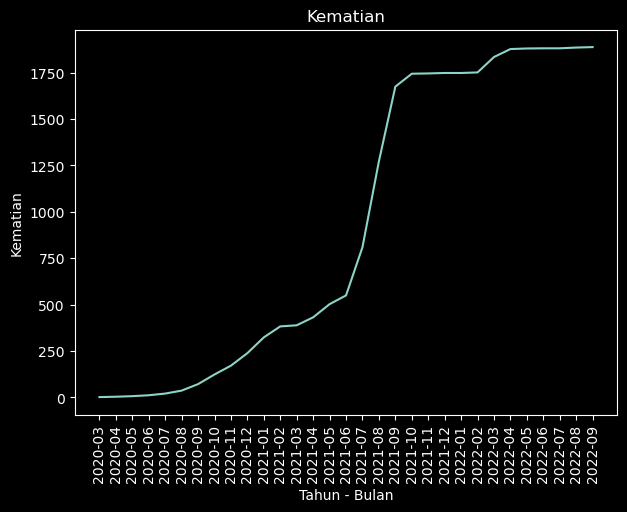

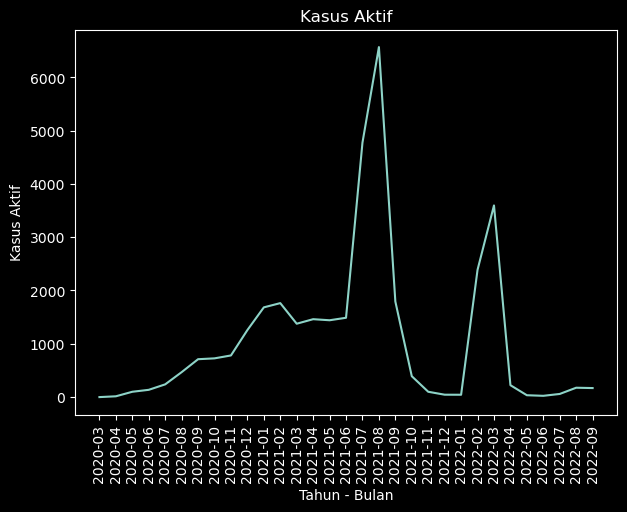

In [13]:
plt.style.use('dark_background')
fig1, ax1 = plt.subplots(figsize=(7,5))
fig2, ax2 = plt.subplots(figsize=(7,5))
ax1.plot(group['Month'],group['Total Deaths'])
ax1.set_title('Kematian')
ax1.set_xlabel("Tahun - Bulan")
ax1.set_ylabel("Kematian")
ax1.tick_params(axis = 'x',rotation = 90)

ax2.plot(group['Month'],group['Total Active Cases'])
ax2.set_title('Kasus Aktif')
ax2.set_xlabel("Tahun - Bulan")
ax2.set_ylabel("Kasus Aktif")
ax2.tick_params(axis = 'x',rotation = 90)

fig1.savefig('Kematian1.png',bbox_inches="tight")
fig2.savefig('Kasus Aktif1.png',bbox_inches="tight")